# Introduction to Time Series

## Exponential Smoothing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels as sm

%matplotlib inline

bike_sharing_df = pd.read_csv('bike_sharing_day.csv', index_col=0)
bike_sharing_df.dteday = pd.to_datetime(bike_sharing_df.dteday)

bike_sharing_df.set_index('dteday', inplace=True)
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Simple Exponential Smoothing

Forecasts are calculated using weighted averages, where the weights decrease exponentially as observations come from further in the past — the smallest weights are associated with the oldest observations:

\begin{equation}
  \hat{y}_{T+1|T} = \alpha y_T + \alpha(1-\alpha) y_{T-1} + \alpha(1-\alpha)^2 y_{T-2}+ \alpha(1-\alpha)^3 y_{T-3}+\cdots,   \tag{7.1}
\end{equation}


where $0 \le \alpha \le 1$ is the smoothing parameter. 



This can be done trivially in pandas via teh `ewm` command:

    bike_sharing_df['cnt_ewm_alpha_0_01'] = bike_sharing_df.cnt.ewm(alpha=0.01).mean()

In [2]:
bike_sharing_df['cnt_ewm_alpha_0_01'] = bike_sharing_df.cnt.ewm(alpha=0.01).mean()
bike_sharing_df['cnt_ewm_alpha_0_03'] = bike_sharing_df.cnt.ewm(alpha=0.03).mean()
bike_sharing_df['cnt_ewm_alpha_0_05'] = bike_sharing_df.cnt.ewm(alpha=0.05).mean()
bike_sharing_df['cnt_ewm_alpha_0_1'] = bike_sharing_df.cnt.ewm(alpha=0.1).mean()
bike_sharing_df['cnt_ewm_alpha_0_3'] = bike_sharing_df.cnt.ewm(alpha=0.3).mean()
bike_sharing_df['cnt_ewm_alpha_0_5'] = bike_sharing_df.cnt.ewm(alpha=0.5).mean()

In [3]:
cnt_cols = [col for col in bike_sharing_df.columns if 'cnt' in col]

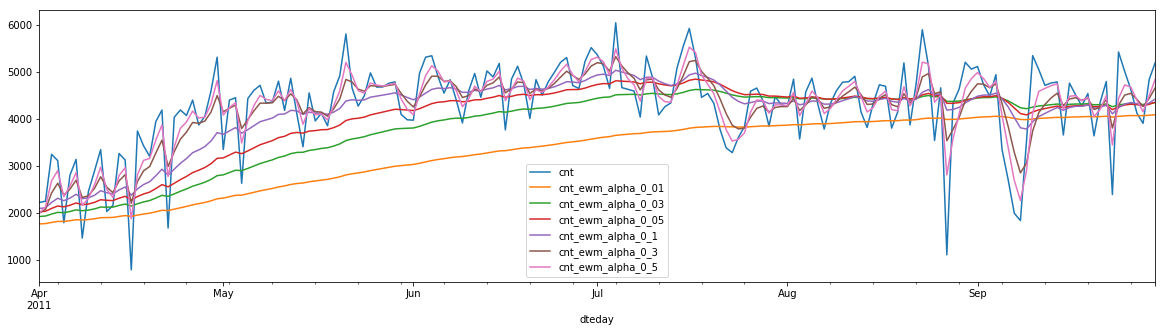

In [4]:
bike_sharing_df['04/2011':'09/2011'][cnt_cols].plot(figsize=(20,5))